In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
# STEP 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
sns.set(style='whitegrid')


In [ ]:
# STEP 3: Load CSV File
df = pd.read_csv("netflix_titles.csv")
print("✅ Data Loaded. Shape:", df.shape)
df.head()


✅ Data Loaded. Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# STEP 4: Data Cleaning

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert date_added with strip and error handling
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Extract duration values and type
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)').fillna('Unknown')

# Fill missing values
df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'rating': 'Unknown',
    'duration': 'Unknown'
}, inplace=True)

# Strip extra spaces
df['rating'] = df['rating'].str.strip()
df['country'] = df['country'].str.strip()

print("✅ Data cleaned. Rows:", df.shape[0])


✅ Data cleaned. Rows: 8807


<ipython-input-8-ebd3b9e0efa2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


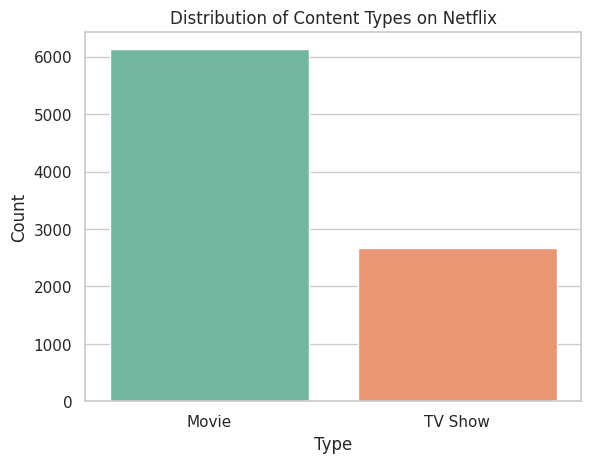

In [ ]:
# STEP 5.1: Type Distribution
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


<ipython-input-9-a712134ae5fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


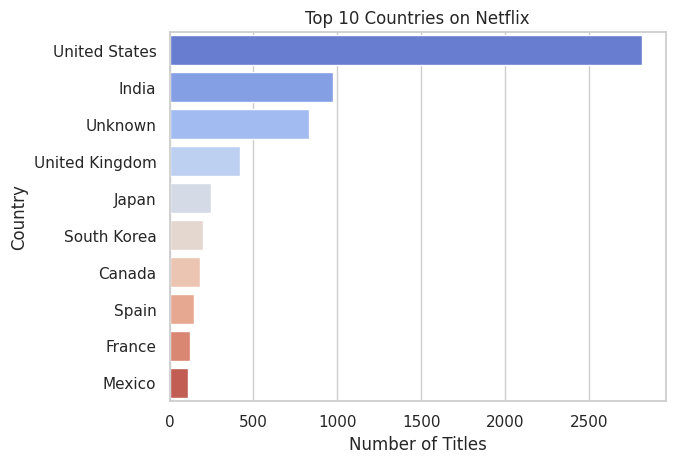

In [ ]:
# STEP 5.2: Top 10 Countries
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


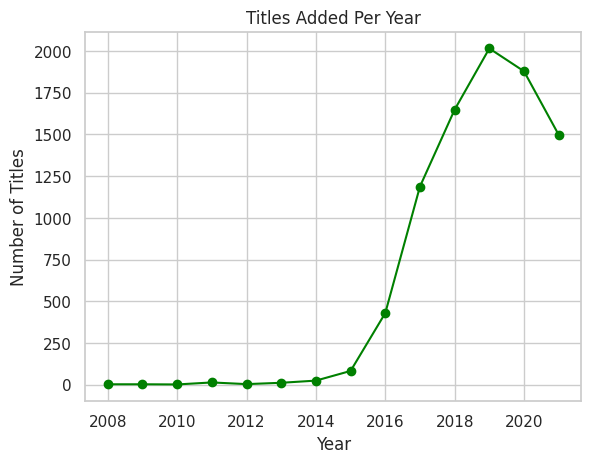

In [ ]:
# STEP 5.3: Titles Added Per Year
titles_per_year = df['year_added'].value_counts().sort_index()
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', color='green')
plt.title('Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


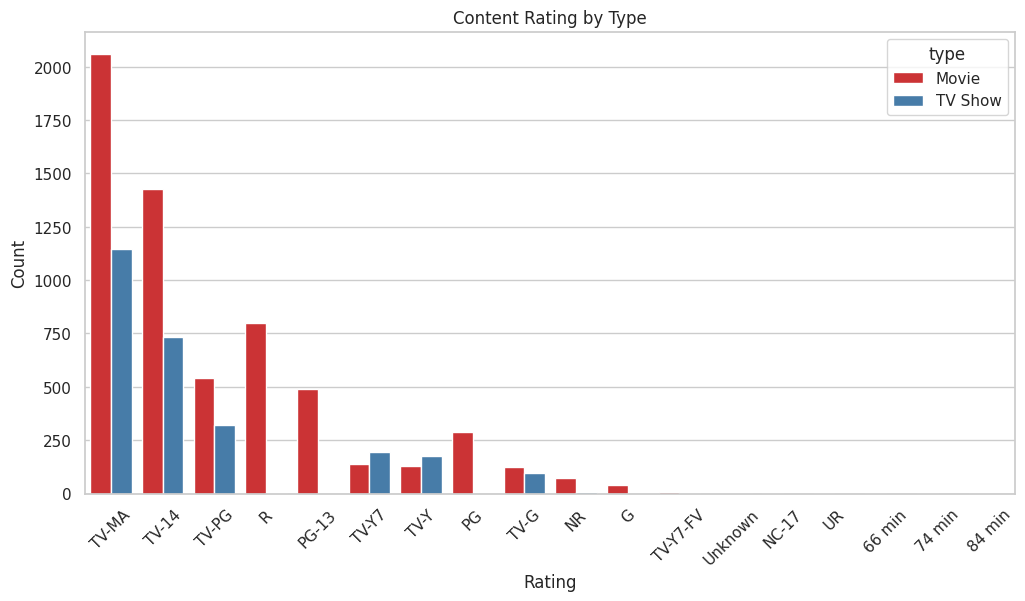

In [ ]:
# STEP 5.4: Ratings by Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='Set1')
plt.title('Content Rating by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-12-5b219d10ef70>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Count', y='Genre', palette='viridis')


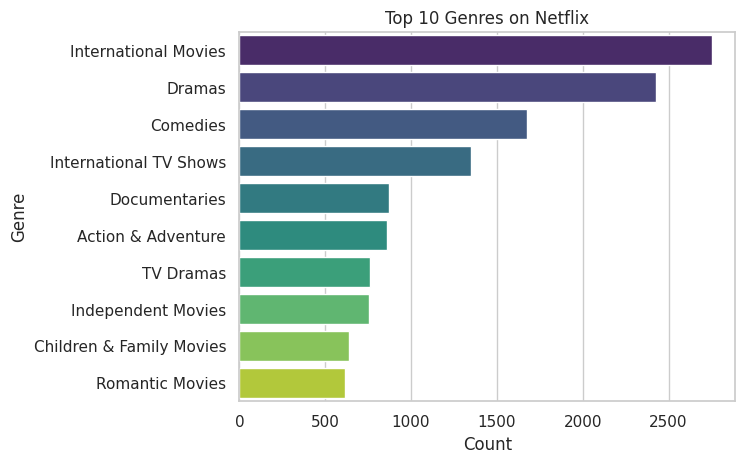

In [ ]:
# STEP 5.5: Top 10 Genres
genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_counts = Counter([genre for sublist in genres for genre in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(data=top_genres, x='Count', y='Genre', palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.show()


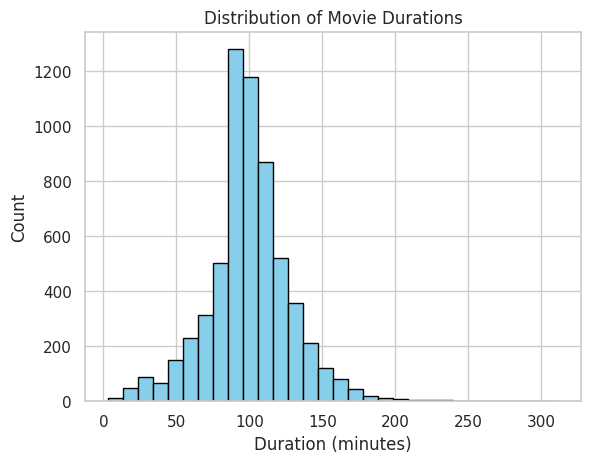

In [ ]:
# STEP 5.6: Movie Duration Distribution
movie_df = df[df['type'] == 'Movie']
plt.hist(movie_df['duration_num'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()
